# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [52]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data processing libraries
import pandas as pd

# Visuals
#!pip install graphviz
#!pip install pydotplus
#!pip install IPython
#import graphviz
#import pydotplus
#from IPython.display import Image
from matplotlib import pyplot as plt

## Loading datasets

In [53]:
df = pd.read_csv(r"League_Result_Data/Encoded_PremierLeague_Stats_From_2014to2021.csv")
#time_df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2569 non-null   int64  
 1   Season                 2569 non-null   object 
 2   Season Encoding        2569 non-null   int64  
 3   Date                   2569 non-null   object 
 4   YearOfSeason           2414 non-null   object 
 5   HomeTeam               2569 non-null   object 
 6   HomeTeam Encoding      2569 non-null   int64  
 7   AwayTeam               2569 non-null   object 
 8   AwayTeam Encoding      2569 non-null   int64  
 9   FTHG                   2569 non-null   float64
 10  FTAG                   2569 non-null   float64
 11  FTR                    2569 non-null   object 
 12  FTR Encoding           2569 non-null   int64  
 13  HTHG                   2569 non-null   float64
 14  HTAG                   2569 non-null   float64
 15  HTR 

## Encodes the YearOfSeason values

In [55]:
df = df.dropna()

seasons = set(df['YearOfSeason'].values)
seasons = list(seasons)

# re-orders the list 
seasons = ['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']
seasons

['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']

In [56]:
df['YearOfSeason Encoding'] = -1

for index, value in df['YearOfSeason'].iteritems():
    
    # 2014/15: 0
    if value == seasons[0]:
        df.at[index, 'YearOfSeason Encoding'] = 0
    
    # 2015/16: 1
    if value == seasons[1]:
        df.at[index, 'YearOfSeason Encoding'] = 1
        
    # 2016/17: 2
    if value == seasons[2]:
        df.at[index, 'YearOfSeason Encoding'] = 2
    
    # 2017/18: 3
    if value == seasons[3]:
        df.at[index, 'YearOfSeason Encoding'] = 3
        
    # 2018/19: 4
    if value == seasons[4]:
        df.at[index, 'YearOfSeason Encoding'] = 4
        
    # 2019/20: 5
    if value == seasons[5]:
        df.at[index, 'YearOfSeason Encoding'] = 5
    
    # 2020/21: 6
    if value == seasons[6]:
        df.at[index, 'YearOfSeason Encoding'] = 6 

In [57]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "Unnamed: 0", "YearOfSeason", "Date", "FTHG", "FTAG", "HTHG", "HTAG", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,HTR Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,8,0,1,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,6,21,0,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,13,11,0,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,28,17,2,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,27,12,2,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,1,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0,0
2565,2,10,15,2,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0,0
2566,2,12,19,0,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0,0
2567,2,14,21,0,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0,0


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 0 to 2568
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        2414 non-null   int64  
 1   HomeTeam Encoding      2414 non-null   int64  
 2   AwayTeam Encoding      2414 non-null   int64  
 3   HTR Encoding           2414 non-null   int64  
 4   Referee Encoding       2414 non-null   int64  
 5   Fouls Called Per Game  2414 non-null   float64
 6   HS                     2414 non-null   float64
 7   AS                     2414 non-null   float64
 8   HST                    2414 non-null   float64
 9   AST                    2414 non-null   float64
 10  HF                     2414 non-null   float64
 11  AF                     2414 non-null   float64
 12  HC                     2414 non-null   float64
 13  AC                     2414 non-null   float64
 14  HY                     2414 non-null   float64
 15  AY  

In [59]:
X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,HTR Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,8,0,1,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,6,21,0,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,13,11,0,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,28,17,2,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,27,12,2,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,1,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0,0
2565,2,10,15,2,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0,0
2566,2,12,19,0,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0,0
2567,2,14,21,0,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0,0


In [60]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0       1
1       0
2       0
3       1
4       1
       ..
2564    1
2565    2
2566    0
2567    0
2568    0
Name: FTR Encoding, Length: 2414, dtype: int64

In [61]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

In [101]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes=15, 
                                      max_features=15,
                                      random_state=42,
                                      min_samples_split=3,
                                      max_depth=5)

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [102]:
score = clf_train.score(X_test, y_test)

print(score)

0.6770186335403726


In [65]:
# Confusion Matrix

cv_score = cross_val_score(clf_train, X_train, y_train, cv=3, scoring='accuracy')

print(cv_score, '\n')

y_train_pred = cross_val_predict(clf_train, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

[0.61024845 0.61024845 0.6096423 ] 

[[636  97 141]
 [ 80 399 110]
 [172 153 143]]


In [66]:
# Precision, Recall, F1

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       874
           1       0.61      0.68      0.64       589
           2       0.36      0.31      0.33       468

    accuracy                           0.61      1931
   macro avg       0.56      0.57      0.57      1931
weighted avg       0.60      0.61      0.60      1931



## Visualizing the tree

Create visual plots for the decision tree

In [67]:
fn = list(X.columns)
cn ='0', '1', '2'

In [68]:
cn

('0', '1', '2')

[Text(148.8, 201.90857142857143, 'X[9] <= 0.294\ngini = 0.643\nsamples = 1931\nvalue = [874, 589, 468]'),
 Text(55.800000000000004, 170.84571428571428, 'X[3] <= -0.649\ngini = 0.595\nsamples = 1283\nvalue = [705, 253, 325]'),
 Text(37.2, 139.78285714285715, 'gini = 0.247\nsamples = 525\nvalue = [452, 20, 53]'),
 Text(74.4, 139.78285714285715, 'X[9] <= -0.59\ngini = 0.665\nsamples = 758\nvalue = [253, 233, 272]'),
 Text(37.2, 108.72, 'X[3] <= 0.503\ngini = 0.632\nsamples = 313\nvalue = [133, 57, 123]'),
 Text(18.6, 77.65714285714284, 'gini = 0.575\nsamples = 53\nvalue = [5, 27, 21]'),
 Text(55.800000000000004, 77.65714285714284, 'X[8] <= -0.089\ngini = 0.59\nsamples = 260\nvalue = [128, 30, 102]'),
 Text(37.2, 46.59428571428572, 'gini = 0.62\nsamples = 139\nvalue = [49, 24, 66]'),
 Text(74.4, 46.59428571428572, 'X[4] <= 0.259\ngini = 0.483\nsamples = 121\nvalue = [79, 6, 36]'),
 Text(55.800000000000004, 15.531428571428563, 'gini = 0.308\nsamples = 63\nvalue = [51, 0, 12]'),
 Text(93.0, 

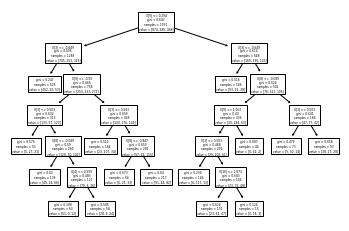

In [69]:
tree.plot_tree(clf_train)

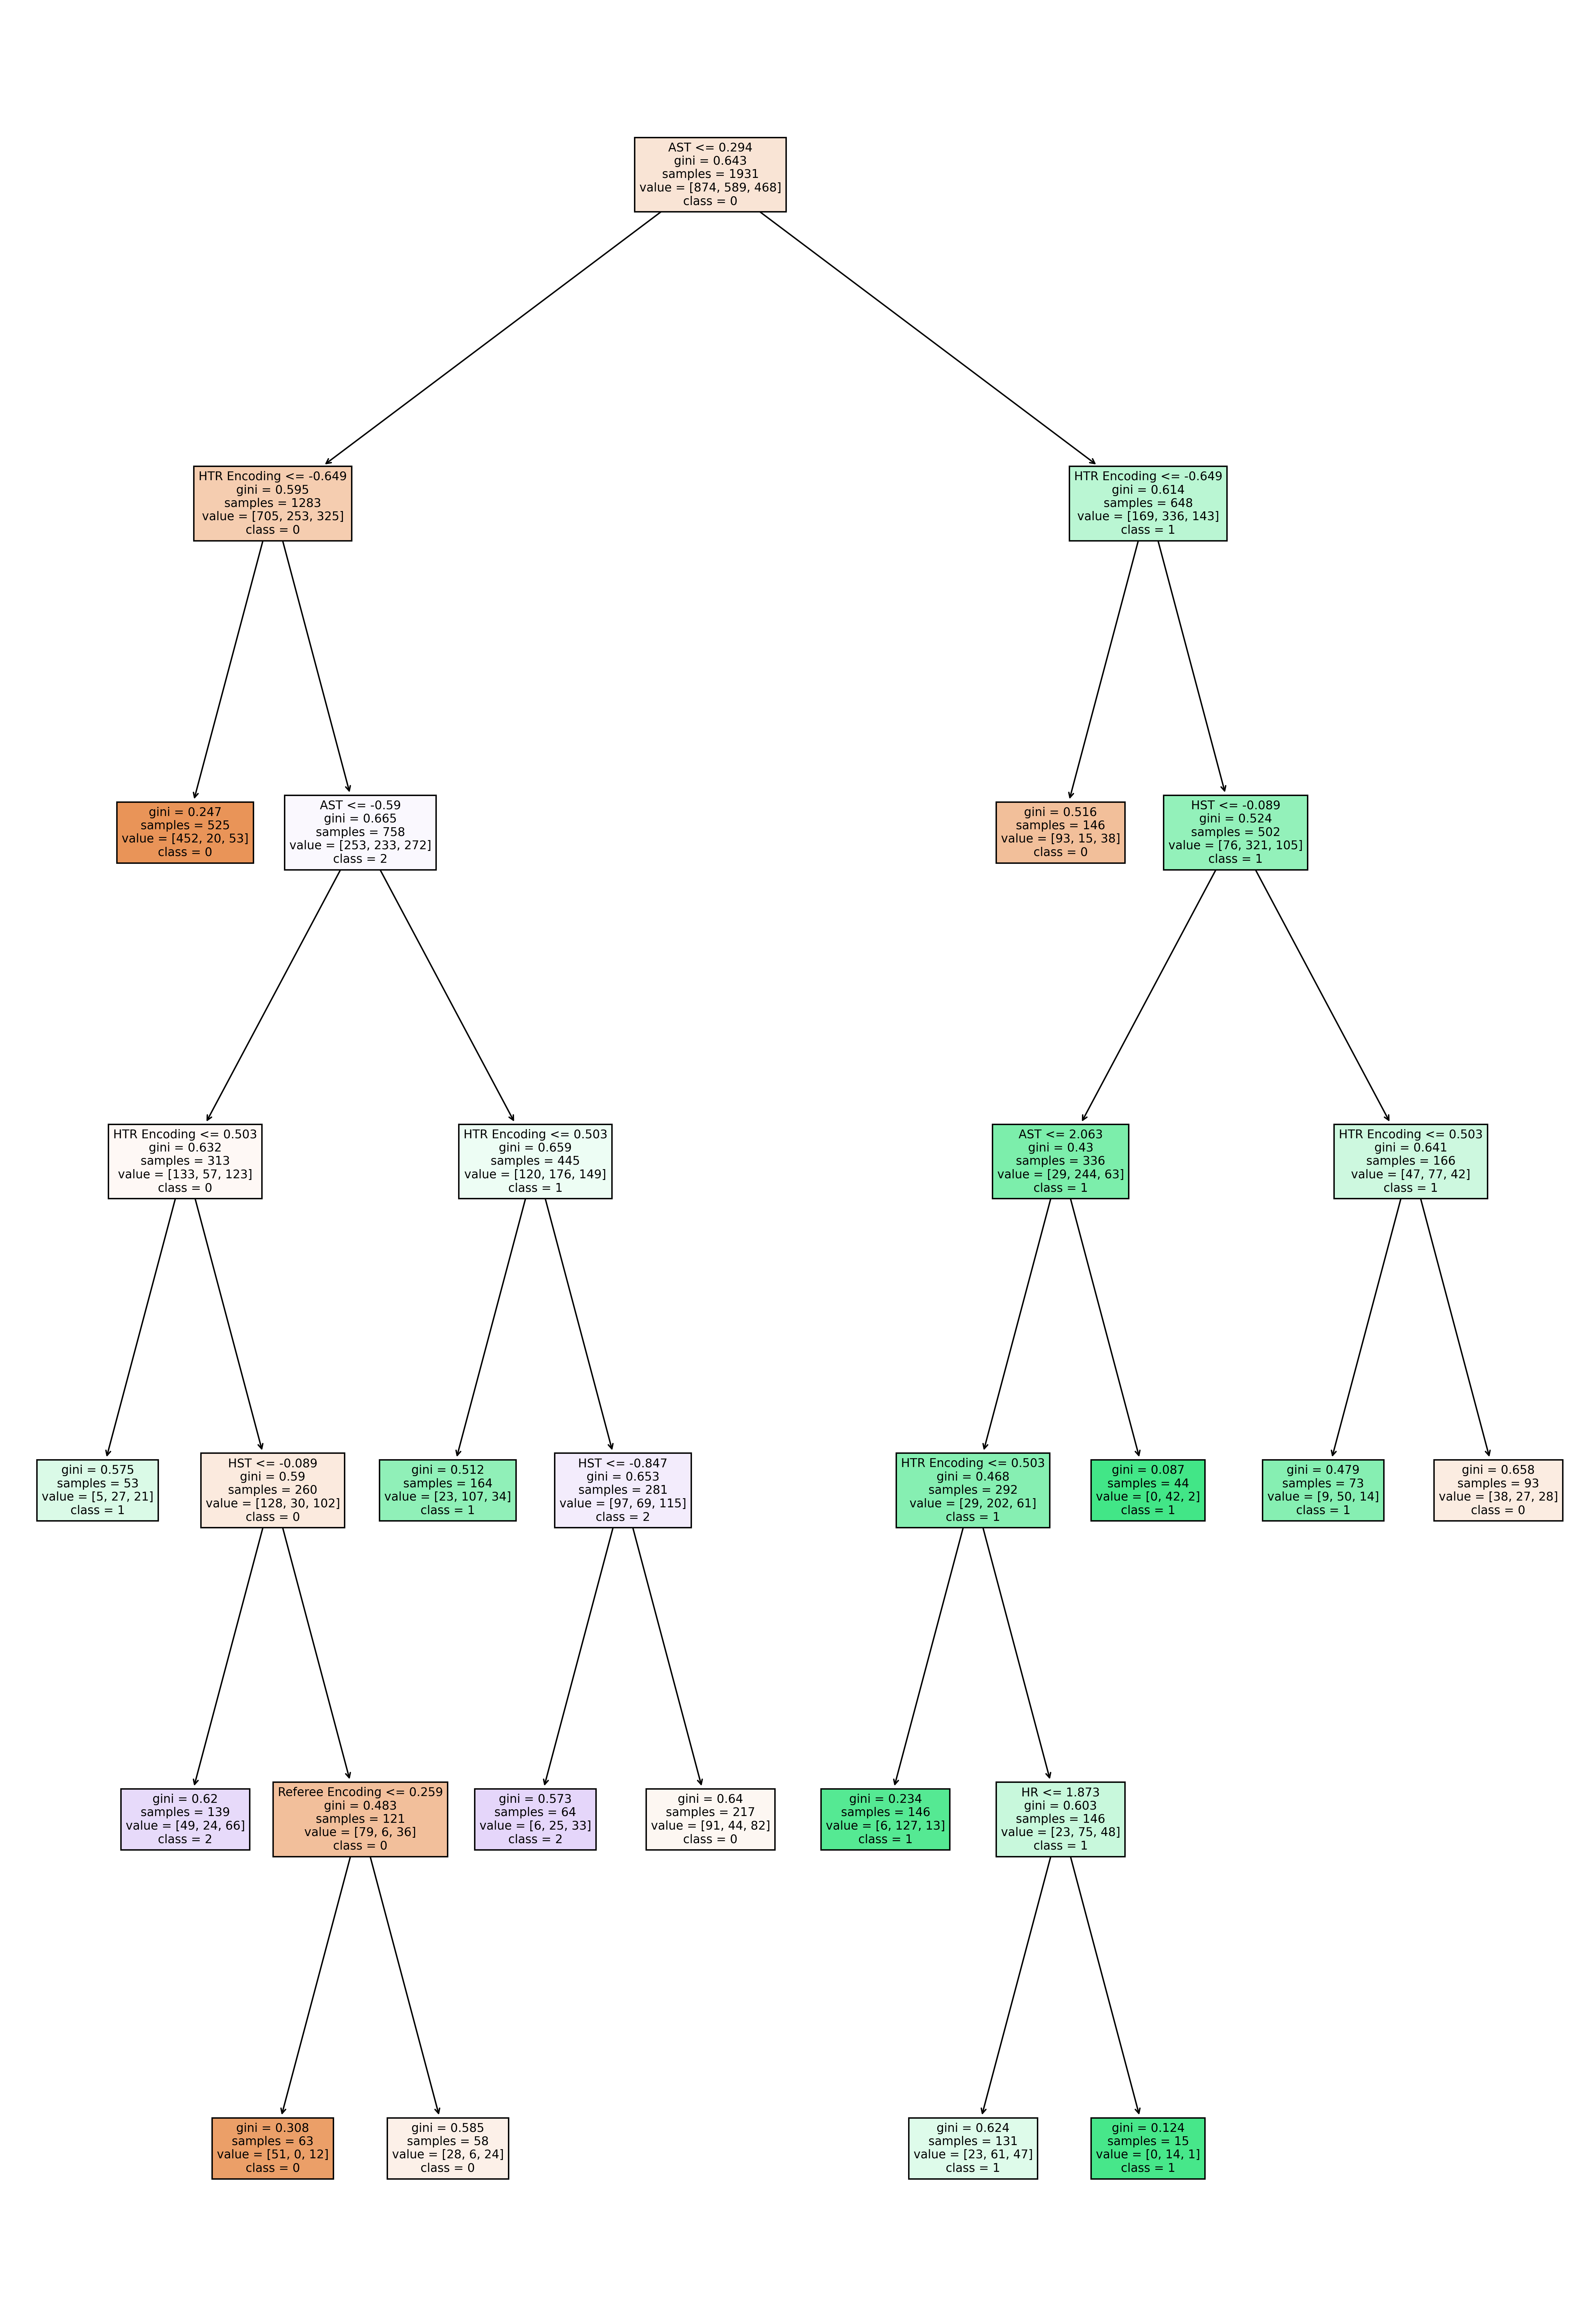

In [70]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d